<a href="https://colab.research.google.com/github/sahilalaknur21/Startup-Fundraising-Exploratory-Data-Analysis-EDA-/blob/main/Startup_Funding_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 STARTUP FUNDRAISING ANALYTICS - PROFESSIONAL EDA
# Author: Sahil Alaknur | Date: 27-09-2025 | Version: 2.0

In [1]:
!pip install plotly kaleido seaborn matplotlib wordcloud plotly-express
print("✅ All packages installed successfully!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 kB 4.0 MB/s eta 0:00:00
✅ All packages installed successfully!


# Library Imports & Configuration

In [3]:
# Enhanced library imports with GitHub-compatible settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# Configure matplotlib for high-quality static output (GitHub compatible)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['savefig.bbox'] = 'tight'

# Configure Plotly for GitHub compatibility
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

# Professional color palette
colors = ['#2E86C1', '#28B463', '#F39C12', '#E74C3C', '#8E44AD', '#17A2B8', '#FFC107', '#DC3545']

print("🎨 Professional styling configured for GitHub compatibility!")
print("📊 Ready for industry-level analysis with static plot generation")

🎨 Professional styling configured for GitHub compatibility!
📊 Ready for industry-level analysis with static plot generation


#Enhanced Data Loading

In [4]:
# ✅ Robust data loading for Colab with error handling
import os

csv_path = "/content/startup_funding.csv"
print(f"🔎 Looking for file at: {csv_path}")

if not os.path.exists(csv_path):
    print("❌ File not found. Upload the file or check path.")
else:
    try:
        df = pd.read_csv('/content/startup_funding.csv')
        print("✅ Dataset loaded successfully!")
        print(f"📄 Rows: {df.shape[0]} | Columns: {df.shape[1]}")
        print(f"🕒 Loaded at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        display(df.head(3))
    except Exception as e:
        print(f"❌ Failed to read CSV: {e}")


🔎 Looking for file at: /content/startup_funding.csv
✅ Dataset loaded successfully!
📄 Rows: 3044 | Columns: 10
🕒 Loaded at: 2025-09-27 14:54:32


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN


# 📊 COMPREHENSIVE DATA OVERVIEW & PROFILING

In [5]:
print("🔍 DATASET EXPLORATION & QUALITY ASSESSMENT")
print("="*60)

print(f"📈 Dataset Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"🔢 Total Data Points: {df.size:,}")

print("\n🏗️ DATA STRUCTURE OVERVIEW:")
print("-" * 40)
df.info()

print("\n📋 ENHANCED DATA PREVIEW:")
print("-" * 40)
styled_preview = df.head(10).style.set_properties(**{
    'background-color': '#f8f9fa',
    'color': '#343a40',
    'border-color': '#dee2e6'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#343a40'), ('color', 'white'), ('font-weight', 'bold')]
}])
display(styled_preview)

print("\n🔍 DATA QUALITY MATRIX:")
print("-" * 40)
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df) * 100).round(2)

quality_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent,
    'Data Type': df.dtypes,
    'Unique Values': df.nunique(),
    'Sample Values': [str(df[col].dropna().iloc[0]) if not df[col].dropna().empty else 'No Data' for col in df.columns]
})

quality_styled = quality_df.style.background_gradient(cmap='RdYlGn_r', subset=['Missing %']).format({
    'Missing %': '{:.1f}%'
})
display(quality_styled)

print(f"\n✨ KEY INSIGHTS:")
print(f"• Total Missing Values: {missing_data.sum():,}")
print(f"• Data Completeness: {((df.size - missing_data.sum()) / df.size * 100):.1f}%")


🔍 DATASET EXPLORATION & QUALITY ASSESSMENT
📈 Dataset Dimensions: 3044 rows × 10 columns
🔢 Total Data Points: 30,440

🏗️ DATA STRUCTURE OVERVIEW:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB

📋 ENHANCED DATA PREVIEW:
----------------------------------------


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",nan
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",nan
7,8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",nan
8,9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",nan
9,10,03/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",nan



🔍 DATA QUALITY MATRIX:
----------------------------------------


,Missing Count,Missing %,Data Type,Unique Values,Sample Values
Amount in USD,960,31.5%,object,471,1
City Location,180,5.9%,object,112,09/01/2020
Date dd/mm/yyyy,0,0.0%,object,1035,BYJU’S
Industry Vertical,171,5.6%,object,821,E-Tech
InvestmentnType,4,0.1%,object,55,E-learning
Investors Name,24,0.8%,object,2412,Bengaluru
Remarks,2625,86.2%,object,72,Tiger Global Management
Sr No,0,0.0%,int64,3044,Private Equity Round
Startup Name,0,0.0%,object,2459,"20,00,00,000"
SubVertical,936,30.8%,object,1942,Pre-Series A



✨ KEY INSIGHTS:
• Total Missing Values: 4,900
• Data Completeness: 83.9%


# 🔧 ADVANCED DATA PREPROCESSING & FEATURE ENGINEERING

In [7]:
print("🛠️ DATA PREPROCESSING PIPELINE")
print("="*50)

df_processed = df.copy()

# Column name standardization
column_mapping = {
    'Sr No': 'id',
    'Date dd/mm/yyyy': 'date',
    'Startup Name': 'startup_name',
    'Industry Vertical': 'industry',
    'SubVertical': 'sub_industry',
    'City  Location': 'location',
    'Investors Name': 'investor',
    'InvestmentnType': 'funding_round',
    'Amount in USD': 'amount_usd',
    'Remarks': 'remarks'
}

df_processed = df_processed.rename(columns=column_mapping)

# Enhanced date processing
df_processed['date'] = pd.to_datetime(df_processed['date'], format='%d/%m/%Y', errors='coerce')
df_processed['year'] = df_processed['date'].dt.year
df_processed['month'] = df_processed['date'].dt.month
df_processed['quarter'] = df_processed['date'].dt.quarter

# Enhanced amount processing
def clean_amount(amount_str):
    if pd.isna(amount_str) or amount_str == 'Undisclosed':
        return np.nan
    amount_str = str(amount_str).replace(',', '').replace('$', '')
    try:
        return float(amount_str)
    except:
        return np.nan

df_processed['amount_cleaned'] = df_processed['amount_usd'].apply(clean_amount)

# Location standardization
location_mapping = {
    'Bengaluru': 'Bangalore',
    'New Delhi': 'Delhi',
    'Gurugram': 'Gurgaon'
}
df_processed['location'] = df_processed['location'].replace(location_mapping)

# Industry categorization
df_processed['industry_category'] = df_processed['industry'].fillna('Other')
df_processed['is_unicorn'] = df_processed['amount_cleaned'].fillna(0) >= 1_000_000_000

print("✅ Data preprocessing completed!")
print(f"📊 Processed dataset shape: {df_processed.shape}")
print(f"🦄 Potential unicorns identified: {df_processed['is_unicorn'].sum()}")

display(df_processed[['startup_name', 'industry', 'location', 'amount_cleaned', 'year', 'is_unicorn']].head())

🛠️ DATA PREPROCESSING PIPELINE
✅ Data preprocessing completed!
📊 Processed dataset shape: (3044, 16)
🦄 Potential unicorns identified: 5


,startup_name,industry,location,amount_cleaned,year,is_unicorn
0,BYJU’S,E-Tech,Bangalore,200000000.0,2020.0,False
1,Shuttl,Transportation,Gurgaon,8048394.0,2020.0,False
2,Mamaearth,E-commerce,Bangalore,18358860.0,2020.0,False
3,https://www.wealthbucket.in/,FinTech,Delhi,3000000.0,2020.0,False
4,Fashor,Fashion and Apparel,Mumbai,1800000.0,2020.0,False


# 📈 Total Funding by Year

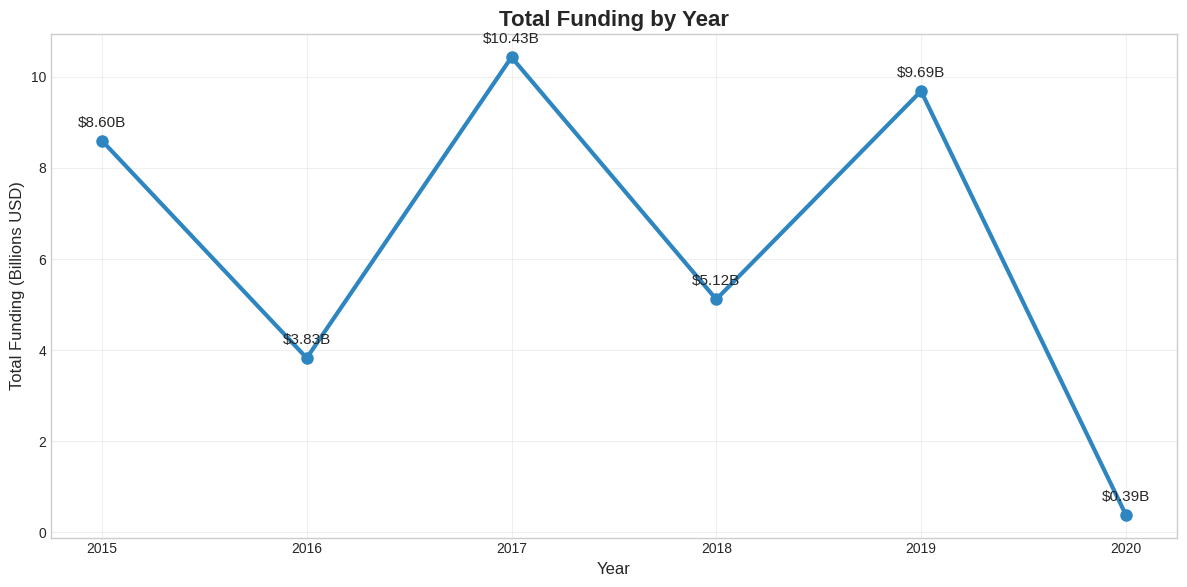

In [8]:

yearly_data = df_processed.groupby('year')['amount_cleaned'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_data['year'], yearly_data['amount_cleaned']/1e9, marker='o', linewidth=3, markersize=8, color='#2E86C1')
plt.title('Total Funding by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Funding (Billions USD)', fontsize=12)
plt.grid(True, alpha=0.3)
for i, v in enumerate(yearly_data['amount_cleaned']/1e9):
    plt.annotate(f'${v:.2f}B', (yearly_data['year'].iloc[i], v), textcoords="offset points", xytext=(0,10), ha='center')
plt.tight_layout()
plt.show()


# 📊 Average Deal Size by Year - Seaborn Bar Plot

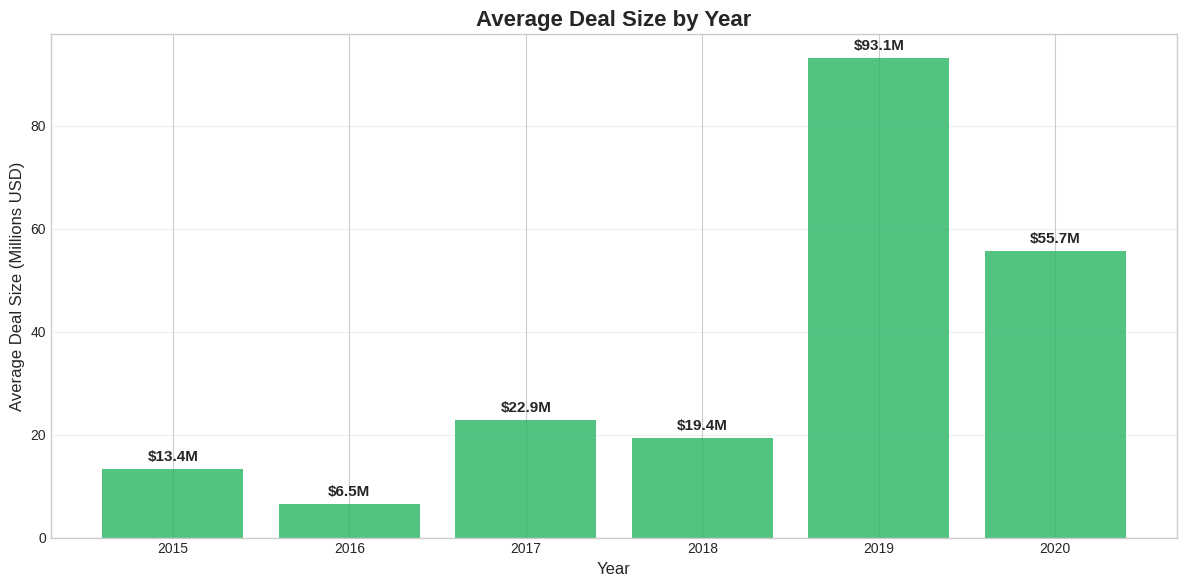

In [9]:
yearly_avg = df_processed.groupby('year')['amount_cleaned'].mean().reset_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(yearly_avg['year'], yearly_avg['amount_cleaned']/1e6, color='#28B463', alpha=0.8)
plt.title('Average Deal Size by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Deal Size (Millions USD)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, yearly_avg['amount_cleaned']/1e6):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'${value:.1f}M',
             ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


# 📈 Deal Count by Year - Line Plot

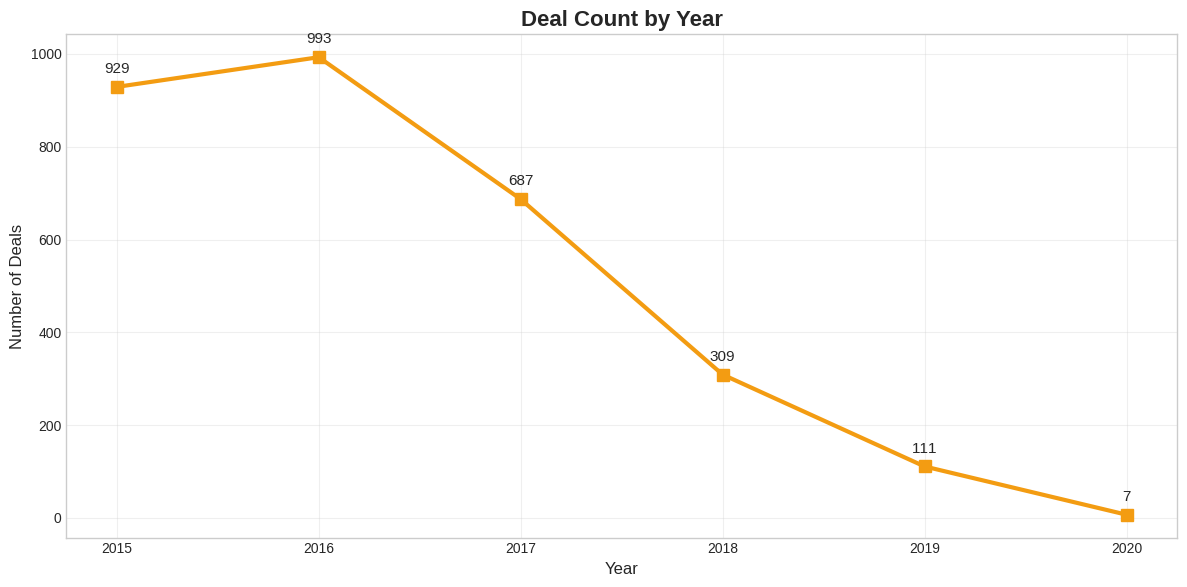

In [10]:
yearly_count = df_processed.groupby('year').size().reset_index(name='deal_count')

plt.figure(figsize=(12, 6))
plt.plot(yearly_count['year'], yearly_count['deal_count'], marker='s', linewidth=3, markersize=8, color='#F39C12')
plt.title('Deal Count by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Deals', fontsize=12)
plt.grid(True, alpha=0.3)
for i, v in enumerate(yearly_count['deal_count']):
    plt.annotate(f'{v}', (yearly_count['year'].iloc[i], v), textcoords="offset points", xytext=(0,10), ha='center')
plt.tight_layout()
plt.show()


# 🏭 Industry Investment Analysis - Horizontal Bar Chart

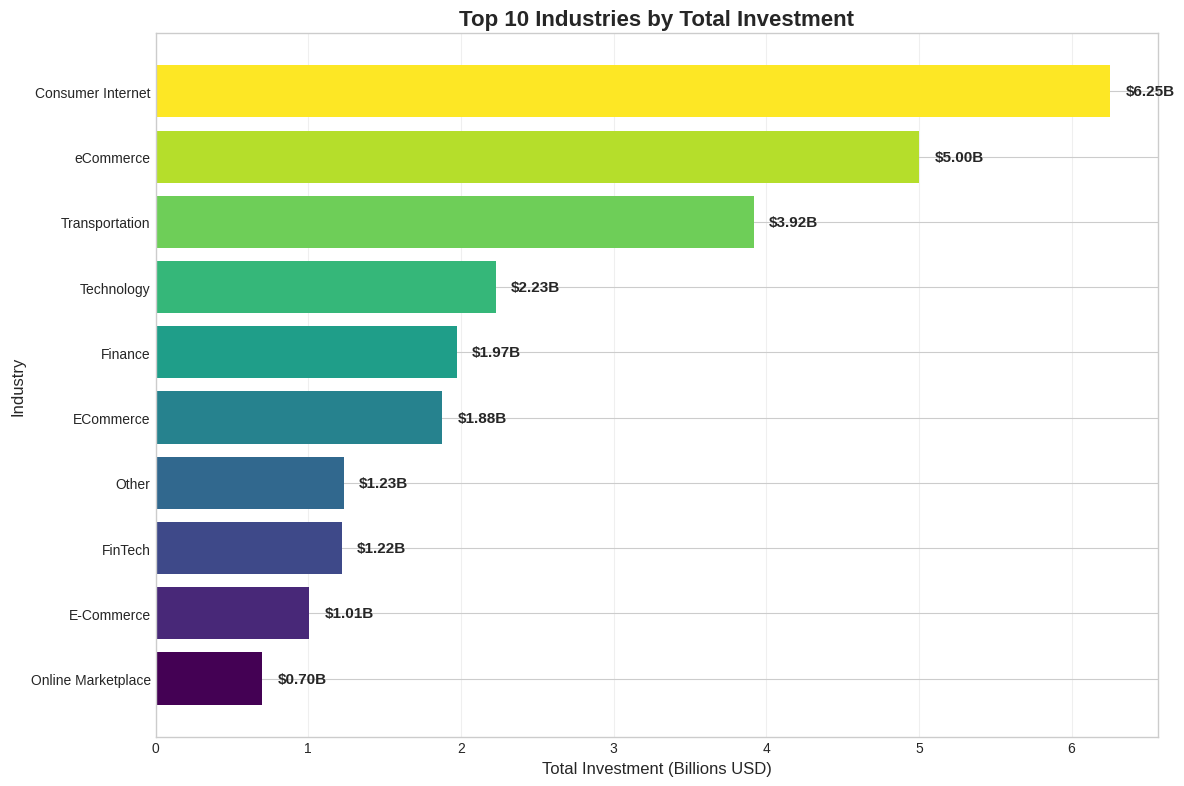

In [11]:
industry_analysis = df_processed.groupby('industry_category')['amount_cleaned'].sum().sort_values(ascending=True).tail(10)

plt.figure(figsize=(12, 8))
bars = plt.barh(industry_analysis.index, industry_analysis.values/1e9, color=plt.cm.viridis(np.linspace(0, 1, len(industry_analysis))))
plt.title('Top 10 Industries by Total Investment', fontsize=16, fontweight='bold')
plt.xlabel('Total Investment (Billions USD)', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, industry_analysis.values/1e9)):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'${value:.2f}B',
             va='center', fontweight='bold')
plt.tight_layout()
plt.show()


# 🥧 Industry Deal Count Distribution

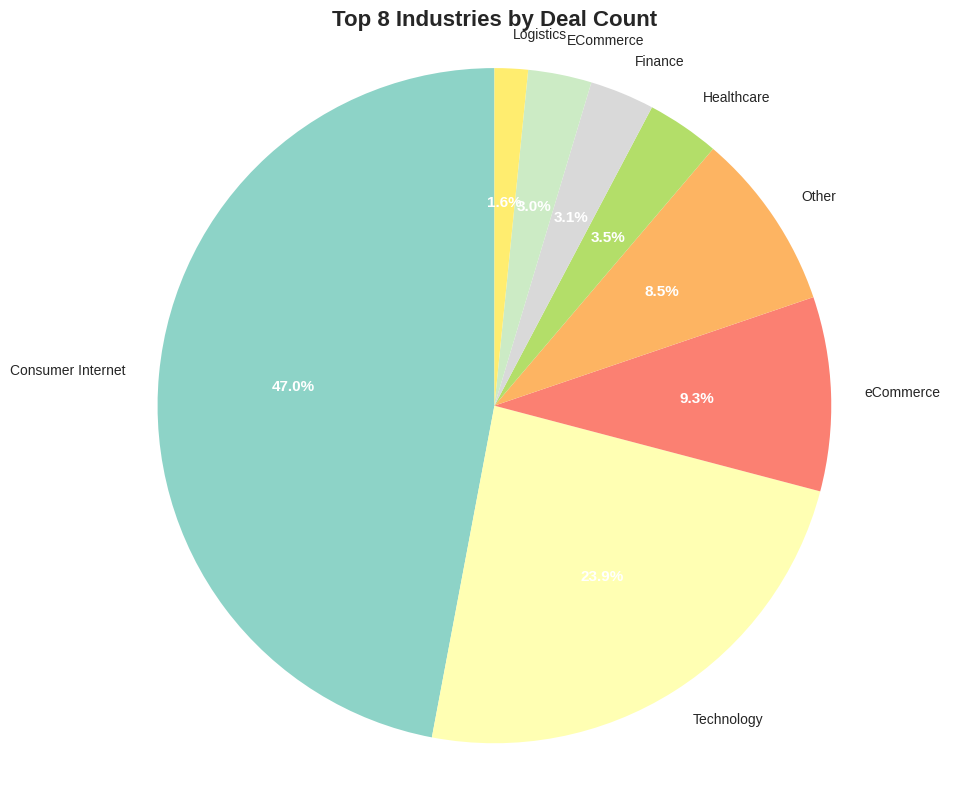

In [12]:
industry_counts = df_processed['industry_category'].value_counts().head(8)

plt.figure(figsize=(10, 8))
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(industry_counts)))
wedges, texts, autotexts = plt.pie(industry_counts.values, labels=industry_counts.index,
                                   autopct='%1.1f%%', colors=colors_pie, startangle=90)
plt.title('Top 8 Industries by Deal Count', fontsize=16, fontweight='bold')

# Beautify text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


# 🗺️ Top Cities by Investment - Horizontal Bar Chart

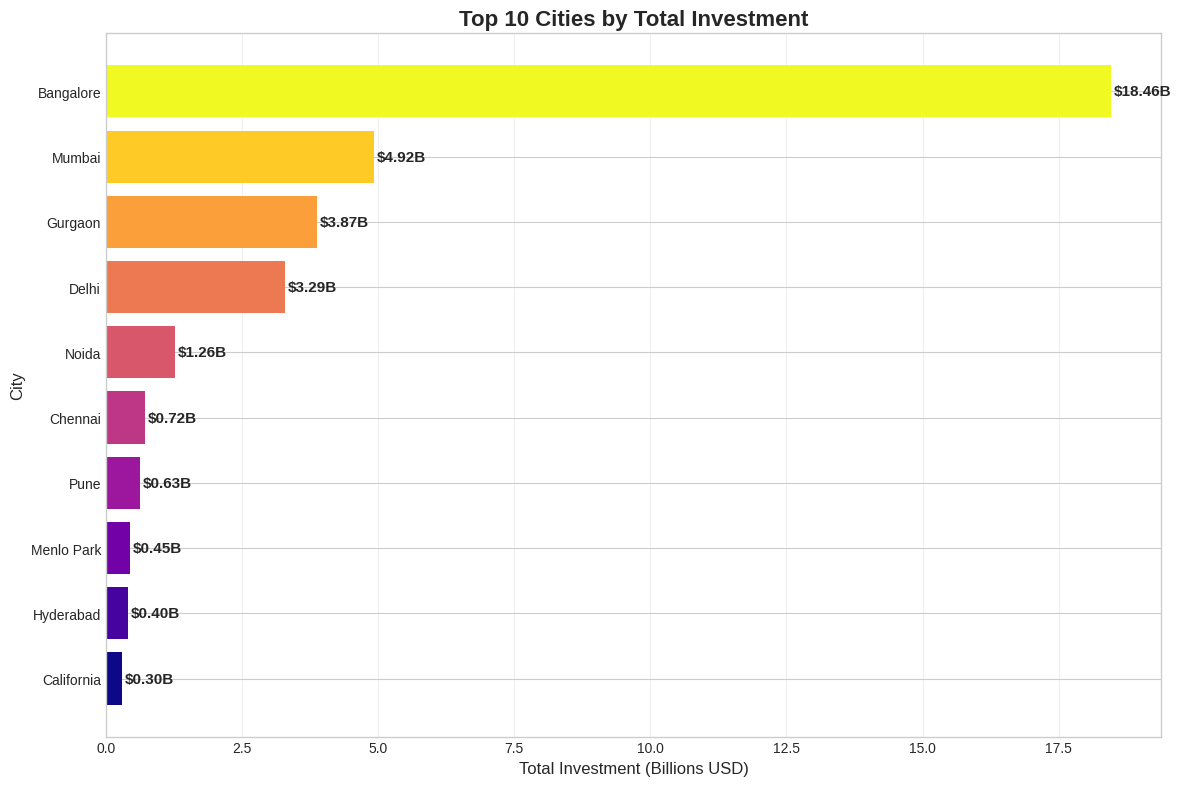

In [13]:
location_analysis = df_processed.groupby('location')['amount_cleaned'].sum().sort_values(ascending=True).tail(10)

plt.figure(figsize=(12, 8))
bars = plt.barh(location_analysis.index, location_analysis.values/1e9,
                color=plt.cm.plasma(np.linspace(0, 1, len(location_analysis))))
plt.title('Top 10 Cities by Total Investment', fontsize=16, fontweight='bold')
plt.xlabel('Total Investment (Billions USD)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for bar, value in zip(bars, location_analysis.values/1e9):
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f'${value:.2f}B',
             va='center', fontweight='bold')
plt.tight_layout()
plt.show()


# 🏙️ City Deal Count Analysis

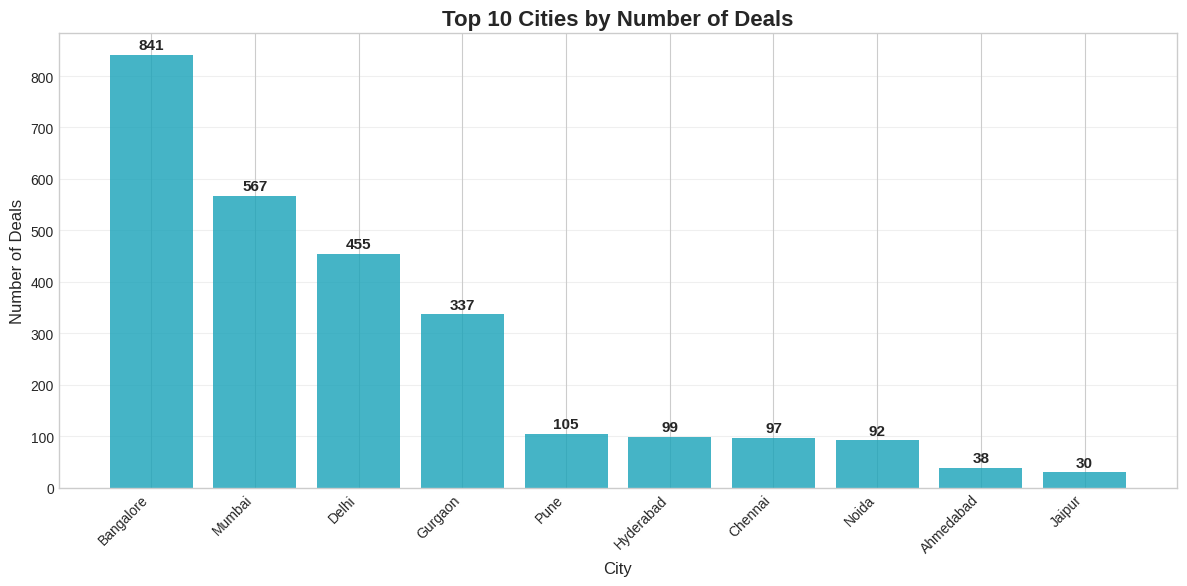

In [14]:
city_counts = df_processed['location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(city_counts.index, city_counts.values, color='#17A2B8', alpha=0.8)
plt.title('Top 10 Cities by Number of Deals', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Deals', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, value in zip(bars, city_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{value}',
             ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


# 💼 Investor Performance Analysis - Top Investors
# Data processing

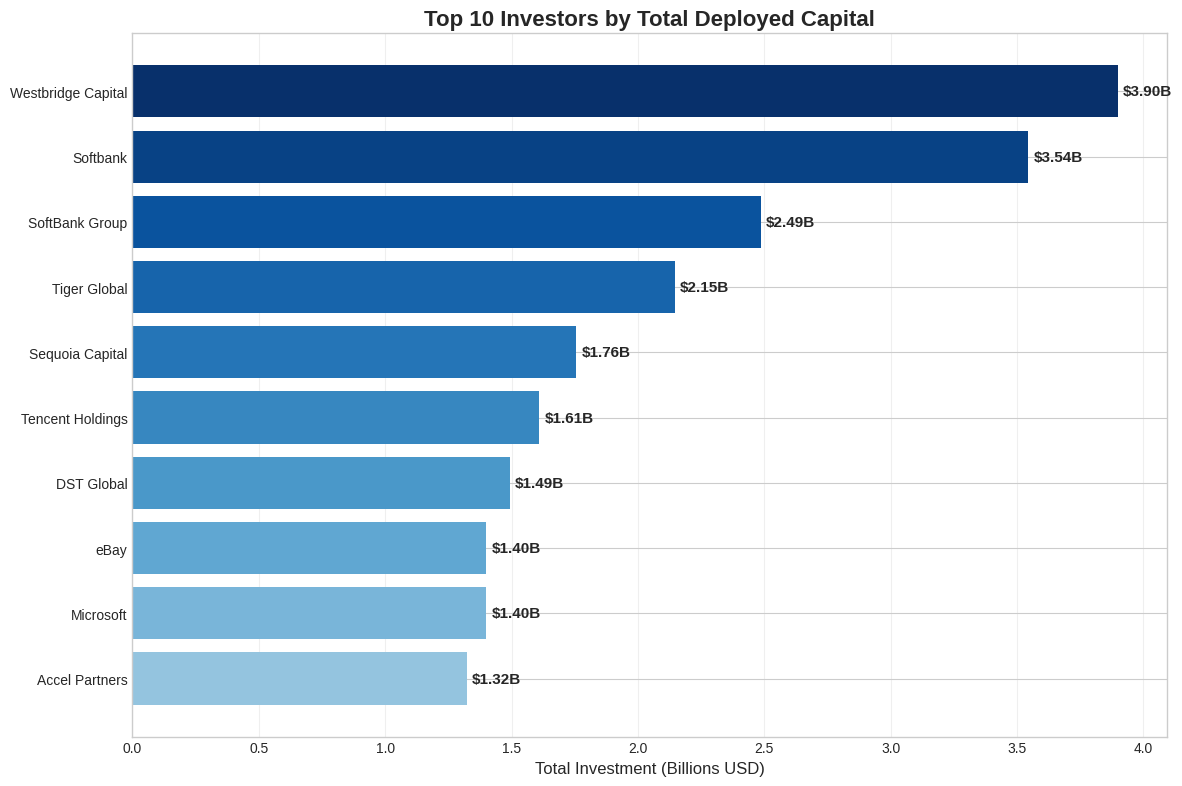

In [15]:
base = df_processed.copy()
inv_col = 'investor'
amt_col = 'amount_cleaned'
name_col = 'startup_name'

def split_investors(x):
    if pd.isna(x): return []
    bad = {'undisclosed','unknown'}
    parts = str(x).replace('&', ',').replace('/', ',').split(',')
    return [p.strip() for p in parts if p.strip() and p.strip().lower() not in bad]

def to_float(v):
    if isinstance(v,(int,float)): return float(v)
    s = str(v).replace(',','').replace('$','').strip().lower()
    return np.nan if s in {'nan','none','undisclosed',''} else (float(s) if s.replace('.','',1).isdigit() else np.nan)

ex = base.copy()
ex['investor_norm'] = ex[inv_col].apply(split_investors)
ex = ex.explode('investor_norm').fillna({'investor_norm':'Unknown'})
ex[amt_col] = ex[amt_col].apply(to_float)

inv = ex.groupby('investor_norm').agg(
    Total_Invested=(amt_col,'sum'),
    Investment_Count=(amt_col,'count'),
    Portfolio_Size=(name_col,'nunique')
).replace([np.inf,-np.inf],np.nan).dropna(subset=['Total_Invested']).sort_values('Total_Invested',ascending=False)

# Top 10 investors by total investment
top_investors = inv.head(10).sort_values('Total_Invested')

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_investors)), top_investors['Total_Invested']/1e9,
                color=plt.cm.Blues(np.linspace(0.4, 1, len(top_investors))))
plt.yticks(range(len(top_investors)), [name[:25] + '...' if len(name) > 25 else name for name in top_investors.index])
plt.title('Top 10 Investors by Total Deployed Capital', fontsize=16, fontweight='bold')
plt.xlabel('Total Investment (Billions USD)', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_investors['Total_Invested']/1e9)):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'${value:.2f}B',
             va='center', fontweight='bold')
plt.tight_layout()
plt.show()


# 📊 Investment Frequency vs Portfolio Breadth

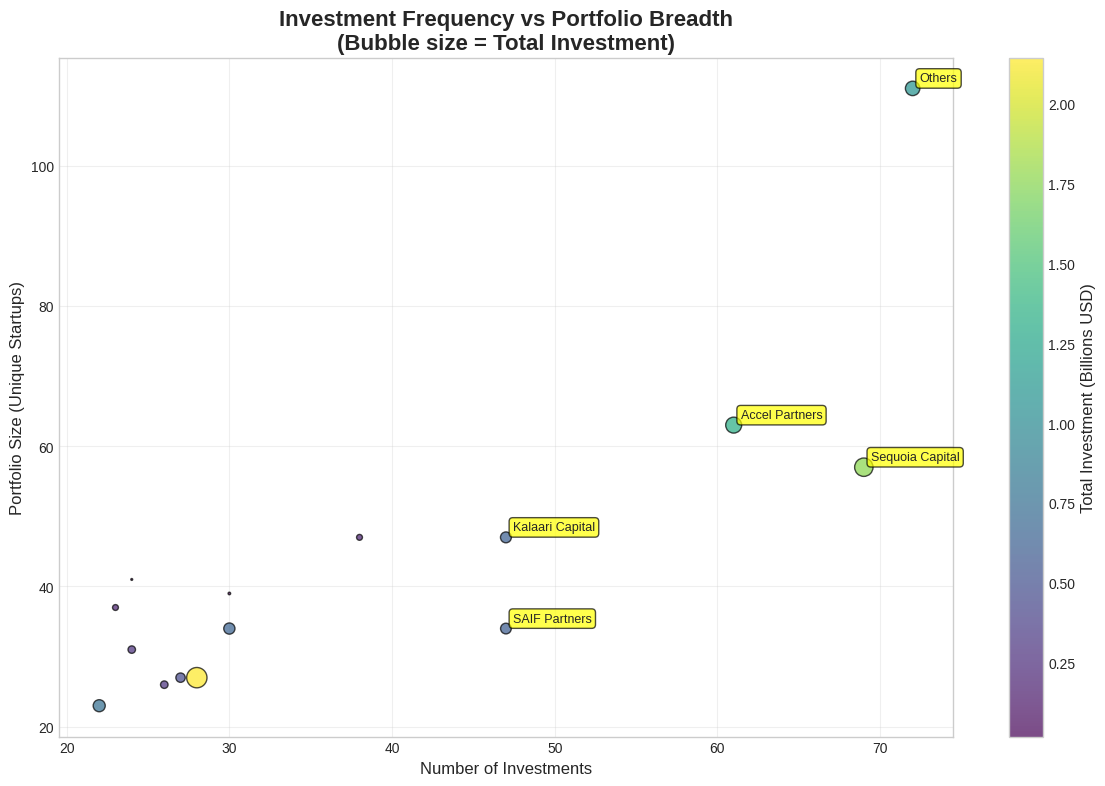

In [16]:
active_investors = inv.sort_values('Investment_Count', ascending=False).head(15)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(active_investors['Investment_Count'], active_investors['Portfolio_Size'],
                     s=active_investors['Total_Invested']/1e7, alpha=0.7, c=active_investors['Total_Invested']/1e9,
                     cmap='viridis', edgecolors='black', linewidth=1)

plt.title('Investment Frequency vs Portfolio Breadth\n(Bubble size = Total Investment)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Investments', fontsize=12)
plt.ylabel('Portfolio Size (Unique Startups)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Total Investment (Billions USD)', fontsize=12)

# Annotate top 5 investors
for i, (idx, row) in enumerate(active_investors.head(5).iterrows()):
    name = idx[:15] + '...' if len(idx) > 15 else idx
    plt.annotate(name, (row['Investment_Count'], row['Portfolio_Size']),
                xytext=(5, 5), textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
plt.tight_layout()
plt.show()


# 🎯 Funding Round Analysis - Distribution by Round Type

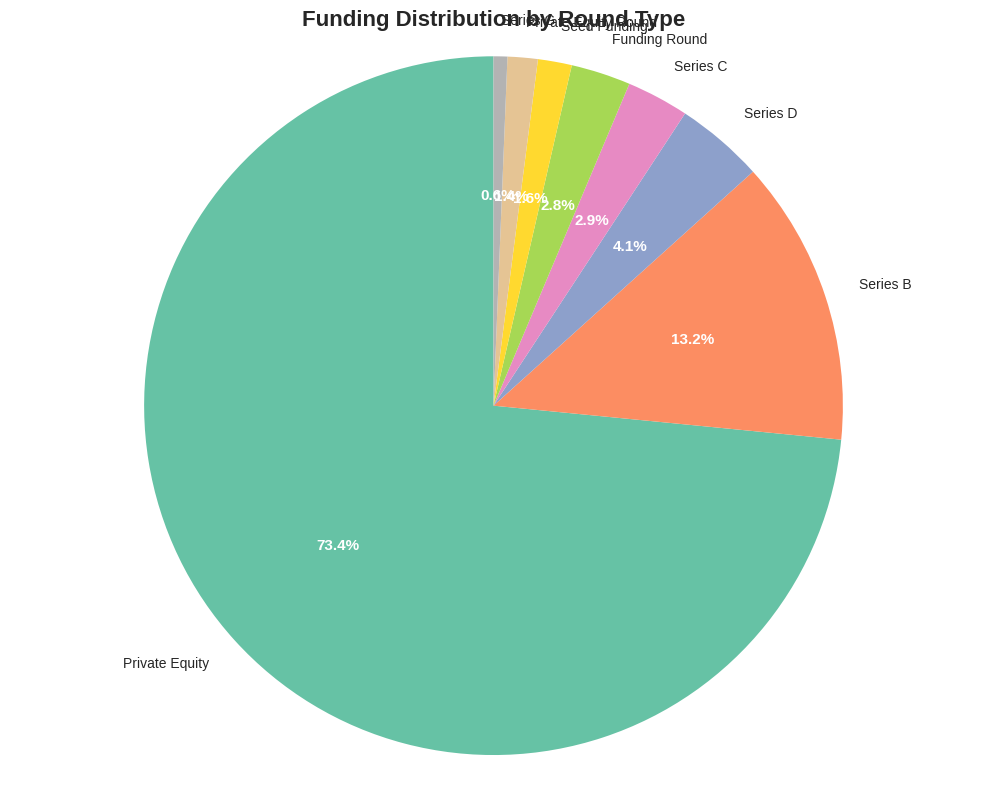

In [17]:
round_col = 'funding_round'
amt_col = 'amount_cleaned'

ra = df_processed.groupby(round_col)['amount_cleaned'].sum().sort_values(ascending=False).head(8)

plt.figure(figsize=(10, 8))
colors_rounds = plt.cm.Set2(np.linspace(0, 1, len(ra)))
wedges, texts, autotexts = plt.pie(ra.values, labels=ra.index, autopct='%1.1f%%',
                                   colors=colors_rounds, startangle=90)
plt.title('Funding Distribution by Round Type', fontsize=16, fontweight='bold')

# Beautify text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


# 💰 Average Deal Size by Funding Round

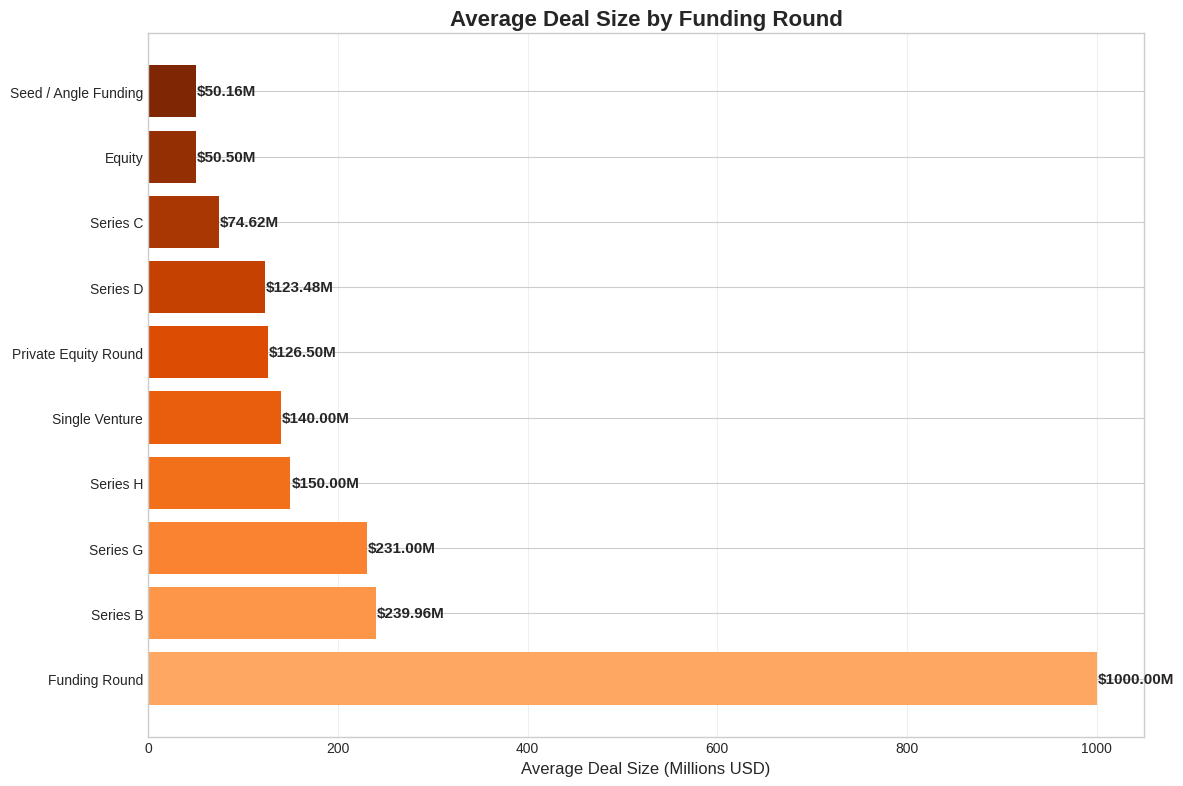

In [19]:
round_avg = df_processed.groupby('funding_round')['amount_cleaned'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(round_avg)), round_avg.values/1e6,
                color=plt.cm.Oranges(np.linspace(0.4, 1, len(round_avg))))
plt.yticks(range(len(round_avg)), round_avg.index)
plt.title('Average Deal Size by Funding Round', fontsize=16, fontweight='bold')
plt.xlabel('Average Deal Size (Millions USD)', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, round_avg.values/1e6)):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'${value:.2f}M',
             va='center', fontweight='bold')
plt.tight_layout()
plt.show()

# 📋 Executive Summary - Key Performance Indicators

In [20]:
base = df_processed.copy()
amt = 'amount_cleaned'
ind = 'industry_category'
loc = 'location'
name = 'startup_name'
inv = 'investor'

# Calculate KPIs
total_funding = base[amt].sum()
total_deals = base[amt].count()
avg_deal = base[amt].mean()
unique_startups = base[name].nunique()
unique_investors = base[inv].nunique()
top_industry = base[ind].value_counts().idxmax()
top_location = base[loc].value_counts().idxmax()
unicorns = int((base[amt] >= 1_000_000_000).sum())

print("="*60)
print("📊 KEY PERFORMANCE INDICATORS")
print("="*60)
print(f"💰 Total Funding: ${total_funding/1e9:.2f} Billion")
print(f"🤝 Total Deals: {total_deals:,}")
print(f"📈 Avg Deal Size: ${avg_deal/1e6:.2f} Million")
print(f"🏢 Unique Startups: {unique_startups:,}")
print(f"💼 Active Investors: {unique_investors:,}")
print(f"🏆 Leading Industry: {top_industry}")
print(f"🌍 Top Location: {top_location}")
print(f"🦄 Potential Unicorns: {unicorns}")


📊 KEY PERFORMANCE INDICATORS
💰 Total Funding: $38.06 Billion
🤝 Total Deals: 2,065
📈 Avg Deal Size: $18.43 Million
🏢 Unique Startups: 2,459
💼 Active Investors: 2,412
🏆 Leading Industry: Consumer Internet
🌍 Top Location: Bangalore
🦄 Potential Unicorns: 5
